# 📌 Problem Statement

## 🔹 Problem Definition
The goal of this project is to build a machine learning model that predicts medical insurance charges based on demographic, lifestyle, and health-related features such as age, BMI, smoking status, and region.

## 🔹 Why this problem matters
Accurate prediction of medical insurance costs helps insurance companies in pricing policies fairly and assists individuals in understanding the factors that most influence their medical expenses.

## 🔹 Target Variable
- **Target:** `charges`
- **Problem Type:** Regression

## 🔹 Evaluation Metrics
- R² Score
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [134]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Loading Data & understanding 

In [135]:
df = pd.read_csv('dataset.csv')
# data overview
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [136]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [137]:
df.shape

(1338, 7)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
df.describe() # check if there are outliers 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [140]:
# Key BMI Categories for Adults:
#    Underweight: Below 18.5
#    Normal Weight: 18.5 – 24.9
#    Overweight: 25.0 – 29.9
#    Obesity: 30.0 or highe


In [141]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Preprocessing

In [142]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [160]:
numerical_columns = ['age', 'bmi', 'children']
categorical_columns = ['sex', 'smoker', 'region']

In [161]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [162]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

In [163]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Exploratory Data Analysis

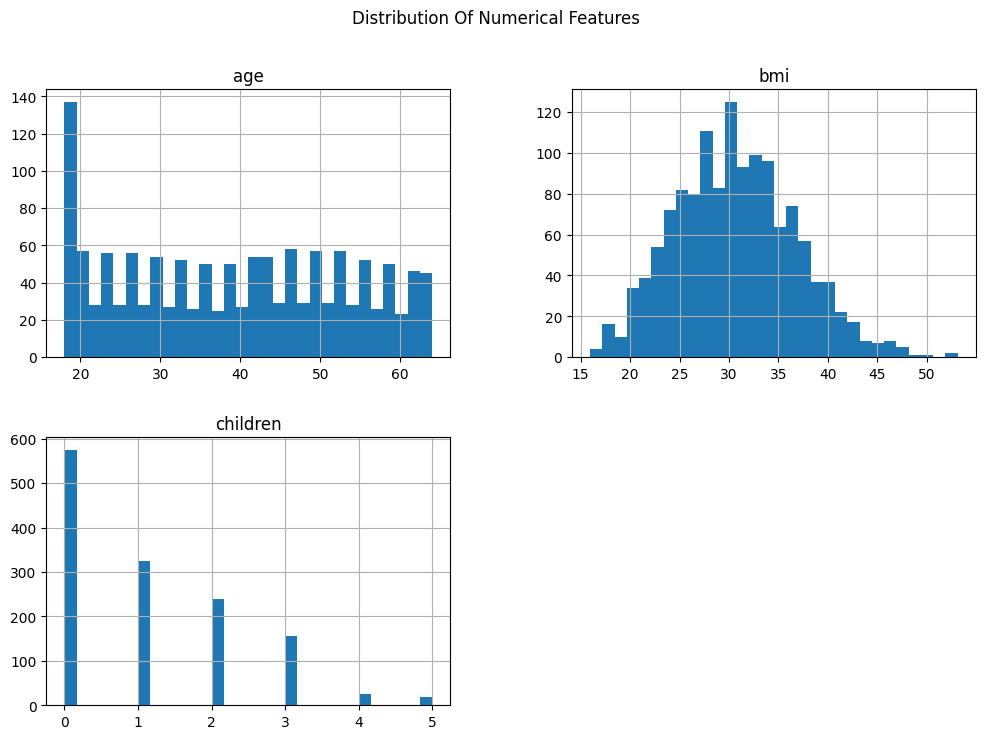

In [148]:
df[numerical_columns].hist(bins = 30 , figsize = (12 , 8))
plt.suptitle ('Distribution Of Numerical Features')
plt.show()

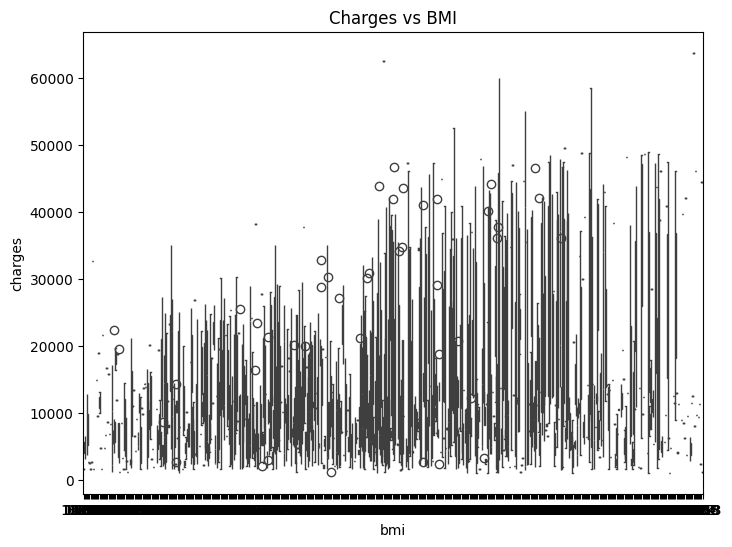

In [164]:
# BoxPlot charges vs BMI
plt.figure(figsize=(8,6))
sns.boxplot(x='bmi', y='charges', data=df)
plt.title('Charges vs BMI')
plt.show()

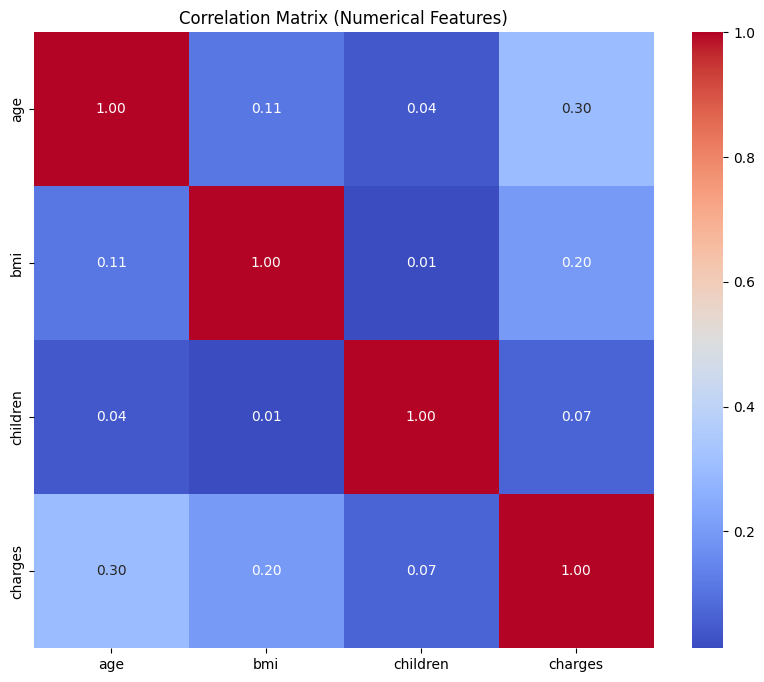

In [150]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

#### training the model (linear Regression)

In [165]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_processed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [166]:
y_pred = lr.predict(X_test_processed)

### 📊 Model Evaluation Metrics
- **R² Score** measures how well the model explains the variance in medical charges.
- **MAE** represents the average absolute prediction error in dollars.
- **RMSE** penalizes large errors more heavily and highlights prediction instability.

In [167]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R2 Score: 0.784
MAE: 4181.19
RMSE: 5796.28


In [168]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_processed, y_train)  # using data after preprocessing
y_pred_rf = rf.predict(X_test_processed)

In [170]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R2 Score: {r2_rf:.3f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")


Random Forest R2 Score: 0.877
Random Forest MAE: 2475.41
Random Forest RMSE: 4367.82


In [171]:

print("Train on random forest R2:", rf.score(X_train_processed, y_train))
print("Test on random forest R2:", rf.score(X_test_processed, y_test))



Train on random forest R2: 0.9052228078985151
Test on random forest R2: 0.8771144574395131
